In [75]:
import pandas as pd
from taigapy import create_taiga_client_v3
import re
from comut import comut
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
tc = create_taiga_client_v3()

We tried using the `OmiicsSomaticMutationsMatrixDamaging` and the `OmicsSomaticMutations`  but we decided to annotate the maf with OncoKB to get all the annotated mutations.

In [3]:
e3_ligases = pd.read_excel("data/E3_ligase_list.xlsx", skiprows=1)

In [4]:
e3_ligases.head()

,Symbol,HGNC,uniprot_ids,Confidence Score,Ge.et.al,UbiHub,UbiBrowser
0,AHCTF1,HGNC:24618,Q8WYP5,1,Yes,No,No
1,ODAD2,HGNC:25583,Q5T2S8,1,Yes,No,No
2,BAZ1A,HGNC:960,Q9NRL2,1,Yes,No,No
3,BAZ1B,HGNC:961,Q9UIG0,1,Yes,No,No
4,BPTF,HGNC:3581,Q12830,1,Yes,No,No


In [5]:
e3_ligases = e3_ligases.loc[e3_ligases["Confidence Score"] >= 3]

In [6]:
e3_ligases = e3_ligases.iloc[1:, 0].str.strip().to_list()

In [7]:
len(e3_ligases)

490

Downloaded directly from depmap because the Taiga2 api didn't work with the `raw` maf file

In [8]:
som_muts_maf = pd.read_csv("pydata/internal-24q4_v116-omicssomaticmutationsmafprofile-maf", sep="\t")

In [9]:
som_muts_maf.head()

,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Variant_Classification,Protein_Change,Hugo_Symbol,NCBI_Build,Strand,InFrame
0,chr1,818203,818203,SNP,G,G,A,PR-t8SaQo,Splice_Site,NaN,FAM87B,GRCh38,+,False
1,chr1,851926,851926,SNP,G,G,A,PR-lhMBt6,Splice_Site,NaN,LINC01128,GRCh38,+,False
2,chr1,852112,852112,SNP,T,T,C,PR-v6so3W,Splice_Site,NaN,LINC01128,GRCh38,+,False
3,chr1,924510,924511,DNP,GC,GC,AA,PR-uKiczK,Missense_Mutation,p.A27K,SAMD11,GRCh38,+,False
4,chr1,924657,924657,SNP,C,C,G,PR-sxFiuq,Missense_Mutation,p.L76V,SAMD11,GRCh38,+,False


In [10]:
som_muts_maf.columns

Index(['Chromosome', 'Start_Position', 'End_Position', 'Variant_Type',
       'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
       'Tumor_Sample_Barcode', 'Variant_Classification', 'Protein_Change',
       'Hugo_Symbol', 'NCBI_Build', 'Strand', 'InFrame'],
      dtype='object')

To filter by `ModelID` we have to use the Profiles data frame, because the maf file is annotated with the profiles

In [11]:
profiles = tc.get(name='internal-24q4-8c04', version=101, file='OmicsProfiles')

In [12]:
profiles.head()

,ProfileID,ModelCondition,ModelID,Datatype,WESKit,Product,Stranded,Source,SharedToDbgap
0,PR-01r7OM,MC-000957-Yckn,ACH-000957,rna,None,None,False,BROAD,None
1,PR-02J1g6,MC-001150-wyma,ACH-001150,wgs,None,None,None,BROAD,None
2,PR-02XmLG,MC-002785-qo9e,ACH-002785,rna,None,None,True,BROAD,None
3,PR-032KRL,MC-002175-99up,ACH-002175,wgs,None,None,None,BROAD,None
4,PR-03qHWS,MC-000753-DxZw,ACH-000753,wgs,None,None,None,BROAD,None


Getting models id from the expression data

In [13]:
models = pd.read_csv("pydata/E3_expr.csv", usecols=[0])

In [14]:
models.head()

,ModelID
0,ACH-000873
1,ACH-000860
2,ACH-000439
3,ACH-000318
4,ACH-001142


In [15]:
profiles.shape

(5964, 9)

In [16]:
profiles = profiles.loc[profiles["ModelID"].isin(models["ModelID"].values)]

In [17]:
profiles.shape

(5627, 9)

In [18]:
som_muts_maf = som_muts_maf.loc[(som_muts_maf["Hugo_Symbol"].isin(e3_ligases)) & som_muts_maf["Tumor_Sample_Barcode"].isin(profiles["ProfileID"])]

For OncoKB annotator

In [19]:
# som_muts_maf.to_csv("pydata/E3ligases_mutations.maf", sep="\t")

After OncoKB annotator

In [20]:
som_muts_maf_annot = pd.read_csv("pydata/E3ligases_mutations_oncoKBannotated.maf", sep ="\t")

/var/folders/_5/qbyf0kk5779gpj3nnpqbc7wr0000gn/T/ipykernel_12408/3460813069.py:1: DtypeWarning: Columns (21,22,23,25,28,29,31,33,37,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  som_muts_maf_annot = pd.read_csv("pydata/E3ligases_mutations_oncoKBannotated.maf", sep ="\t")


In [21]:
som_muts_maf_annot.head()

,Unnamed: 0,Chromosome,Start_Position,End_Position,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Variant_Classification,...,LEVEL_Dx1,LEVEL_Dx2,LEVEL_Dx3,HIGHEST_DX_LEVEL,DX_CITATIONS,LEVEL_Px1,LEVEL_Px2,LEVEL_Px3,HIGHEST_PX_LEVEL,PX_CITATIONS
0,57,chr1,960730,960730,SNP,C,C,A,PR-GYB91T,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58,chr1,960766,960766,SNP,G,G,A,PR-voYF6y,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59,chr1,960779,960779,SNP,C,C,T,PR-EsLxqT,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60,chr1,961298,961298,SNP,A,A,G,PR-RWQgdj,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,chr1,961327,961327,SNP,C,C,G,PR-rq0sPs,Missense_Mutation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
som_muts_maf_annot = som_muts_maf_annot.loc[som_muts_maf_annot["Hugo_Symbol"].isin(e3_ligases)]

In [23]:
som_muts_maf_annot["ONCOGENIC"].value_counts()

ONCOGENIC
Unknown             29908
Likely Oncogenic      798
Oncogenic              75
Inconclusive           42
Likely Neutral          2
Name: count, dtype: int64

In [24]:
som_muts_maf_annot["MUTATION_EFFECT"].value_counts()

MUTATION_EFFECT
Unknown                    29930
Likely Loss-of-function      738
Loss-of-function             113
Inconclusive                  42
Likely Neutral                 2
Name: count, dtype: int64

In [25]:
som_muts_maf_annot = som_muts_maf_annot.loc[(som_muts_maf_annot["MUTATION_EFFECT"] != "Unknown") & 
                                            (som_muts_maf_annot["MUTATION_EFFECT"] != "Likely Neutral") &
                                            (som_muts_maf_annot["MUTATION_EFFECT"] != "Inconclusive")]

In [26]:
som_muts_maf_annot.shape

(851, 42)

In [27]:
som_muts_maf_annot["MUTATION_EFFECT"] = som_muts_maf_annot["MUTATION_EFFECT"].apply(lambda mut: re.sub("Likely ", "", mut))

In [28]:
som_muts_maf_annot["MUTATION_EFFECT"].value_counts()

MUTATION_EFFECT
Loss-of-function    851
Name: count, dtype: int64

In [29]:
som_muts_maf_annot["ONCOGENIC"].value_counts()

ONCOGENIC
Likely Oncogenic    776
Oncogenic            75
Name: count, dtype: int64

## Ploting comut

In [30]:
models = pd.read_pickle("pydata/model_data.pkl")

In [31]:
models.head()

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,None,...,None,None,None,NIHOVCAR3_OVARY,None,Available in SRA,None,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,None,None,None,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,None,...,None,None,None,CACO2_LARGE_INTESTINE,None,Available in SRA,None,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,None,None,None,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,None,None,None,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,NaN,SIDM00593,NaN


In [32]:
models = models.merge(profiles[["ModelID", "ProfileID"]], on = "ModelID")

In [33]:
models = models.loc[models["ProfileID"].isin(som_muts_maf_annot["Tumor_Sample_Barcode"].values)]

In [34]:
models.head()

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID,ProfileID
36,ACH-000015,PT-ffwajI,NCI-H1581,NCIH1581,LCLC,Lung,Non-Small Cell Lung Cancer,Large Cell Lung Carcinoma,LCLC,None,...,None,None,NCIH1581_LUNG,None,Available in SRA,None,1237.0,SIDM00748,908471.0,PR-l6NjDm
42,ACH-000018,PT-Mi0cKz,T24,T24,BLCA,Bladder/Urinary Tract,Bladder Urothelial Carcinoma,Bladder Urothelial Carcinoma,BLCA,None,...,None,None,T24_URINARY_TRACT,None,Available in SRA,None,1455.0,SIDM01184,724812.0,PR-gCyy2l
45,ACH-000019,PT-viJKnw,MCF7,MCF7,BRCA,Breast,Invasive Breast Carcinoma,Invasive Breast Carcinoma,BRCA,None,...,None,None,MCF7_BREAST,None,Available in SRA,ER+,588.0,SIDM00148,905946.0,PR-nO7vwQ
151,ACH-000060,PT-9JMXWA,Panc 10.05,PANC1005,PAAD,Pancreas,Pancreatic Adenocarcinoma,Pancreatic Adenocarcinoma,PAAD,None,...,None,None,PANC1005_PANCREAS,None,Available in SRA,None,197.0,SIDM01135,925348.0,PR-3f91xT
152,ACH-000060,PT-9JMXWA,Panc 10.05,PANC1005,PAAD,Pancreas,Pancreatic Adenocarcinoma,Pancreatic Adenocarcinoma,PAAD,None,...,None,None,PANC1005_PANCREAS,None,Available in SRA,None,197.0,SIDM01135,925348.0,PR-d145Wa


In [35]:
som_muts_maf_annot = pd.merge(how="left", left=som_muts_maf_annot, left_on="Tumor_Sample_Barcode",
                              right=models[["ProfileID", "StrippedCellLineName","OncotreeLineage", "ModelID"]],
                              right_on="ProfileID",)

### Comut by lineage

In [105]:
def get_comut_by_lineage(lineage, w, h):
    comut_data = som_muts_maf_annot.loc[som_muts_maf_annot["OncotreeLineage"] == lineage, ["Hugo_Symbol", "StrippedCellLineName","Variant_Classification", "MUTATION_EFFECT"]]
    comut_data = comut_data.rename(columns={"StrippedCellLineName": "sample","Hugo_Symbol": "category", "Variant_Classification": "value"})
    e3l_comut = comut.CoMut()
    e3l_comut.add_categorical_data(comut_data, name = 'Mutation type')
    e3l_comut.plot_comut(figsize = (w,h))
    e3l_comut.add_unified_legend()
    plt.title(f"E3 ligases mutations in {lineage}")
    

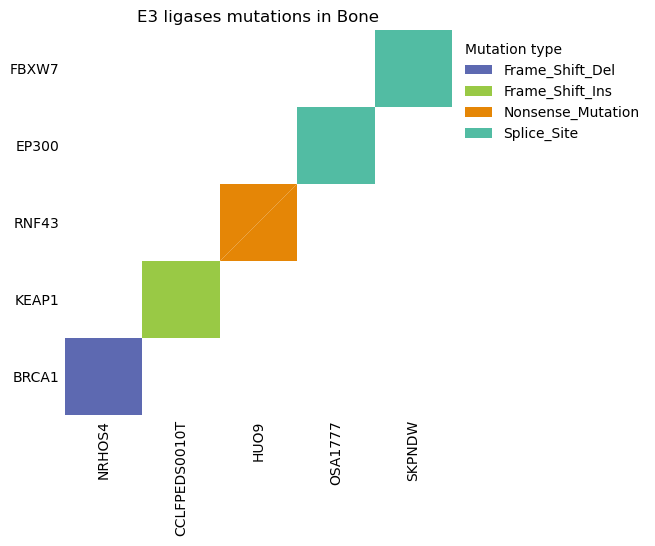

In [108]:
get_comut_by_lineage("Bone", 5, 5)

### Ploting mut/wt TF score

In [39]:
tf_score = pd.read_pickle("pydata/tfs_dependencies_filtered.pkl")

In [101]:
def get_mut_wt_boxplot(e3, tf, lineage):
    mut_lines = som_muts_maf_annot.loc[(som_muts_maf_annot["OncotreeLineage"] == lineage) &
                                    (som_muts_maf_annot["Hugo_Symbol"] == e3), "ModelID"]
    mut_score = tf_score.loc[tf_score.index.isin(mut_lines),tf]
    wt_score = tf_score.loc[~tf_score.index.isin(mut_lines), tf]
    statistic, p_value = mannwhitneyu(wt_score, mut_score, alternative='two-sided')
    fig = plt.figure(figsize = (5,4))
    ax = plt.subplot(111)
    ax.boxplot([mut_score, wt_score], flierprops={'markersize': 2})
    ax.set_xticklabels(["MUT", "WT"])
    ax.spines[['right', 'top']].set_visible(False)
    y, h, col = pd.concat([mut_score, wt_score]).max() +0.05, 0.1, 'k'
    x1,x2 = 1, 2
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if p_value < 0.25:
        plt.text((x1+x2)*.5, y+h, f"{p_value:.3e}", ha='center', va='bottom', color=col)
    else:
        plt.text((x1+x2)*.5, y+h, f"ns", ha='center', va='bottom', color=col) 
    plt.title(f"{tf} effect in {e3} mutant cell lines")
    plt.show()

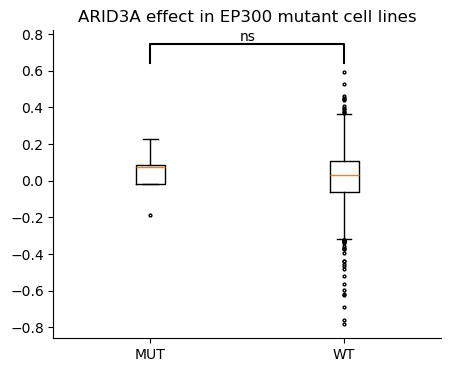

In [102]:
get_mut_wt_boxplot("EP300", "ARID3A", "Skin")